In [1]:
import cartopy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.interpolate
import xarray as xr
import netCDF4 as nc4

## create function for vertical grid spacing

In [8]:
vertical = xr.open_dataset('vgrid_32_5.nc')
vertical

<xarray.Dataset>
Dimensions:  (nz: 31)
Dimensions without coordinates: nz
Data variables:
    dz       (nz) float64 ...
Attributes:
    title:     vertical grid test
    subtitle:  lambda = 0.07

In [6]:
unknown_num_of_layers = xr.open_dataset('./vgrid_32_6.nc')
unknown_num_of_layers

<xarray.Dataset>
Dimensions:  (nz: 32)
Dimensions without coordinates: nz
Data variables:
    dz       (nz) float64 ...
Attributes:
    title:     vertical grid test
    subtitle:  lambda = 0.07

In [3]:
orig = np.arange(0,33,1) # array of #s 0-32 # NK=32
nk = 33 # NK is number of levels
lmda = 0.07 # set lambda
H = 4000

dz_np = np.zeros((33,1))
for i in orig:
    dz_np[i] = int((lmda * H)/((np.cosh(lmda*(nk-orig[i]-1-0.5))**2)*np.tanh(lmda*nk)))
dz_np
dz_np.shape

(33, 1)

In [235]:
add = dz_np.sum() - 4000 - dz_np[31]

In [236]:
dz_np[31] = dz_np[31] - add

In [237]:
dz_np[30]

array([282.])

In [238]:
dz_np = np.delete(dz_np,-1)
dz_np

array([ 13.,  15.,  17.,  20.,  23.,  26.,  30.,  34.,  39.,  45.,  51.,
        58.,  65.,  74.,  83.,  93., 105., 117., 130., 144., 158., 173.,
       188., 204., 219., 233., 247., 259., 269., 277., 282., 309.])

In [239]:
dz_np.sum()

4000.0

In [240]:
dz_np.shape

(32,)

In [241]:
f = nc4.Dataset('/home/jupyter-kuyeda/t_m_p_wind/INPUT/vgrid_32_6.nc','w',format='NETCDF4')

In [242]:
try: ncfile.close()
except:pass
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 


## create dimensions

In [243]:
orig = f.createDimension('nz',len(dz_np))

In [244]:
for dim in f.dimensions.items():
    print(dim)

('nz', <class 'netCDF4._netCDF4.Dimension'>: name = 'nz', size = 32)


## create attributes

In [245]:
f.title='vertical grid test'
print(f.title)

vertical grid test


In [246]:
f.subtitle = 'lambda = 0.07'
print(f.subtitle)
print(f)

lambda = 0.07
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: vertical grid test
    subtitle: lambda = 0.07
    dimensions(sizes): nz(32)
    variables(dimensions): 
    groups: 


## create variable

In [247]:
dz = f.createVariable('dz',np.float64,('nz'))
dz.long_name = 'z coordinate level thickness'
dz.units = 'm'
print(dz)

<class 'netCDF4._netCDF4.Variable'>
float64 dz(nz)
    long_name: z coordinate level thickness
    units: m
unlimited dimensions: 
current shape = (32,)
filling on, default _FillValue of 9.969209968386869e+36 used


## assign variable

In [248]:
dz[:] = dz_np
print(dz[:])
print(dz.units)

[ 13.  15.  17.  20.  23.  26.  30.  34.  39.  45.  51.  58.  65.  74.
  83.  93. 105. 117. 130. 144. 158. 173. 188. 204. 219. 233. 247. 259.
 269. 277. 282. 309.]
m


## close out file

In [249]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: vertical grid test
    subtitle: lambda = 0.07
    dimensions(sizes): nz(32)
    variables(dimensions): float64 dz(nz)
    groups: 


In [250]:
f.close(); print('dataset is closed')

dataset is closed


## check file

In [251]:
vertical = xr.open_dataset('vgrid_32_6.nc')
vertical

<xarray.Dataset>
Dimensions:  (nz: 32)
Dimensions without coordinates: nz
Data variables:
    dz       (nz) float64 ...
Attributes:
    title:     vertical grid test
    subtitle:  lambda = 0.07

In [252]:
vertical.dz.values

array([ 13.,  15.,  17.,  20.,  23.,  26.,  30.,  34.,  39.,  45.,  51.,
        58.,  65.,  74.,  83.,  93., 105., 117., 130., 144., 158., 173.,
       188., 204., 219., 233., 247., 259., 269., 277., 282., 309.])

In [253]:
pwd

'/home/jupyter-kuyeda/t_m_p_wind/INPUT'

In [254]:
vertical.dz.cumsum('nz')

<xarray.DataArray 'dz' (nz: 32)>
array([  13.,   28.,   45.,   65.,   88.,  114.,  144.,  178.,  217.,
        262.,  313.,  371.,  436.,  510.,  593.,  686.,  791.,  908.,
       1038., 1182., 1340., 1513., 1701., 1905., 2124., 2357., 2604.,
       2863., 3132., 3409., 3691., 4000.])
Dimensions without coordinates: nz

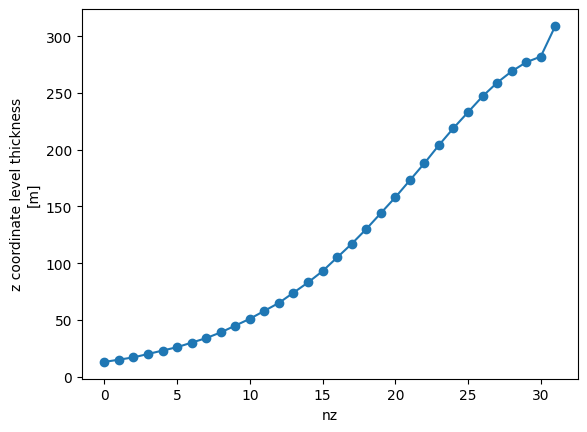

In [255]:
vertical.dz.plot(marker='o')

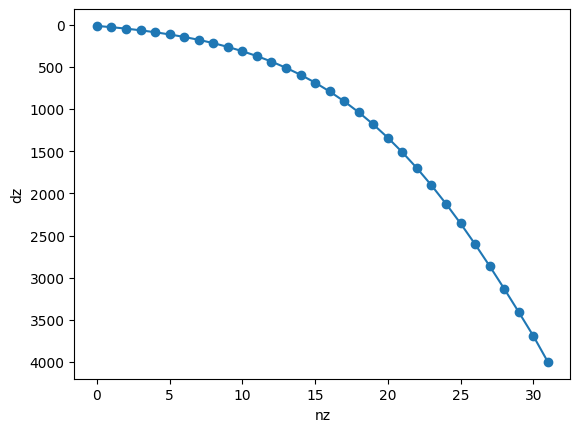

In [256]:
vertical.dz.cumsum().plot(marker='o')
plt.gca().invert_yaxis()

In [257]:
orig = np.arange(0,32,1) # array of #s 0-32 # NK=32
nk = 32 # NK is number of levels
lmda = 0.07 # set lambda
H = 4000

dz_np = np.zeros((32,1))
for i in orig:
    dz_np[i] = (lmda * H)/((np.cosh(lmda*(nk-orig[i]-1-0.5))**2)*np.tanh(lmda*nk))
dz_np

array([[ 15.57990405],
       [ 17.84711592],
       [ 20.43175706],
       [ 23.3743389 ],
       [ 26.71930299],
       [ 30.51499594],
       [ 34.8134805 ],
       [ 39.67012472],
       [ 45.14289859],
       [ 51.29129612],
       [ 58.17479026],
       [ 65.85072208],
       [ 74.37152607],
       [ 83.7812065 ],
       [ 94.11100895],
       [105.37428407],
       [117.56062256],
       [130.62945523],
       [144.50346121],
       [159.06230268],
       [174.13739053],
       [189.50855184],
       [204.90357464],
       [220.00159623],
       [234.44112741],
       [247.83312883],
       [259.77897713],
       [269.89242669],
       [277.82389739],
       [283.28475668],
       [286.06888832],
       [286.06888832]])

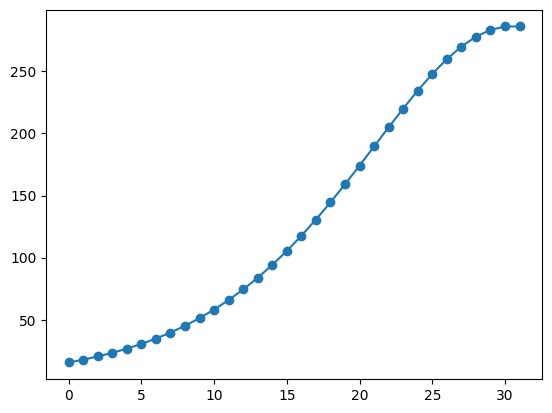

In [258]:
plt.plot(dz_np,marker='o')